# Import Necessary Libraries
Import libraries such as numpy, pandas, matplotlib, seaborn, plotly, and datetime.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set Display Options
Set pandas display options and seaborn style.

In [6]:
# Set display options
pd.set_option('display.max_columns', None)  # Display all columns in the dataframe
sns.set_style('whitegrid')  # Set seaborn style to whitegrid

# Download the Online Retail Dataset
Download the dataset using wget.

In [10]:
# Download the Online Retail dataset
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
filename = "Online_Retail.xlsx"
urllib.request.urlretrieve(url, filename)
print(f"Downloaded {filename}")

Downloaded Online_Retail.xlsx


# Load the Dataset
Load the dataset into a pandas DataFrame.

In [13]:
# Load the dataset
df = pd.read_excel('Online_Retail.xlsx')

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Display Basic Information
Display the shape and first few rows of the dataset.

In [14]:
# Display basic information
print(f"Dataset shape: {df.shape}")  # Print the shape of the dataset
df.head()  # Display the first few rows of the dataset

Dataset shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Check for Missing Values
Check for missing values in the dataset.

In [15]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())  # Print the count of missing values for each column


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Check Data Types
Check the data types of the columns.

In [16]:
# Check data types
print("\nData types:")
print(df.dtypes)  # Print the data types of each column


Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


# Basic Statistics
Display basic statistics of the dataset.

In [17]:
# Basic Statistics

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())  # Display basic statistics of the dataset


Basic statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Convert InvoiceDate to Datetime
Convert the InvoiceDate column to datetime format.

In [18]:
# Convert InvoiceDate to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Date Components
Extract year, month, day, hour, and day of the week from InvoiceDate.

In [19]:
# Extract Date Components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Calculate Total Price
Calculate the total price for each record.

In [20]:
# Calculate Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Calculate total price for each record and add it as a new column

# Remove Records with Negative Quantities
Remove records with negative quantities.

In [21]:
# Remove records with negative quantities (likely returns)
df_no_returns = df[df['Quantity'] > 0]

# Remove Records with Missing CustomerID
Remove records with missing CustomerID.

In [22]:
# Remove records with missing CustomerID
df_clean = df_no_returns.dropna(subset=['CustomerID'])  # Drop rows where CustomerID is missing

# Check for Outliers in Quantity and UnitPrice
Visualize outliers in Quantity and UnitPrice using boxplots.

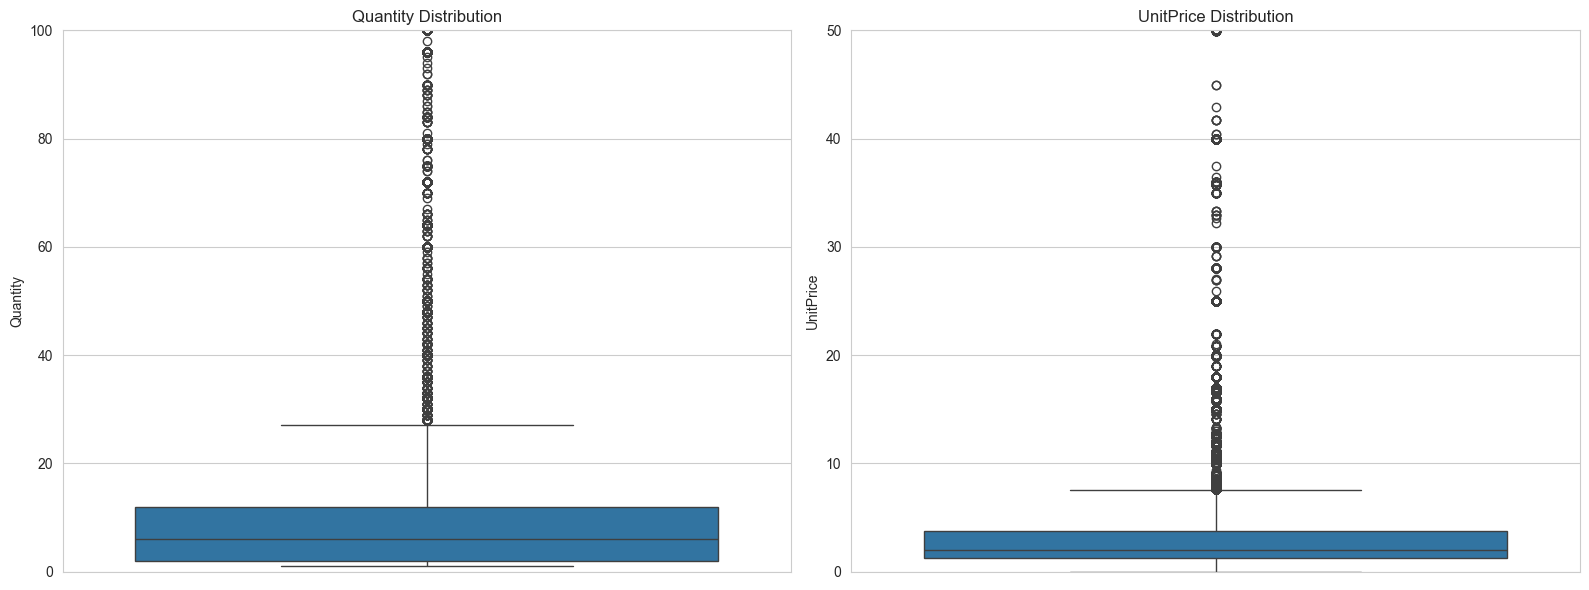

In [23]:
# Check for Outliers in Quantity and UnitPrice

plt.figure(figsize=(16, 6))

# Boxplot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean['Quantity'])
plt.title('Quantity Distribution')
plt.ylim(0, 100)  # Limit y-axis for better visualization

# Boxplot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['UnitPrice'])
plt.title('UnitPrice Distribution')
plt.ylim(0, 50)  # Limit y-axis for better visualization

plt.tight_layout()
plt.show()

# Remove Extreme Outliers
Remove extreme outliers from Quantity and UnitPrice.

In [24]:
# Remove extreme outliers from Quantity and UnitPrice
df_clean = df_clean[df_clean['Quantity'] <= 100]
df_clean = df_clean[df_clean['UnitPrice'] <= 500]

# Check Unique Counts
Check the number of unique customers, products, invoices, and countries.

In [25]:
# Check Unique Counts
print(f"\nNumber of unique customers: {df_clean['CustomerID'].nunique()}")
print(f"Number of unique products: {df_clean['StockCode'].nunique()}")
print(f"Number of unique invoices: {df_clean['InvoiceNo'].nunique()}")
print(f"Number of unique countries: {df_clean['Country'].nunique()}")


Number of unique customers: 4300
Number of unique products: 3662
Number of unique invoices: 18093
Number of unique countries: 37


# Explore Order Frequency by Country
Visualize the top 10 countries by order frequency.

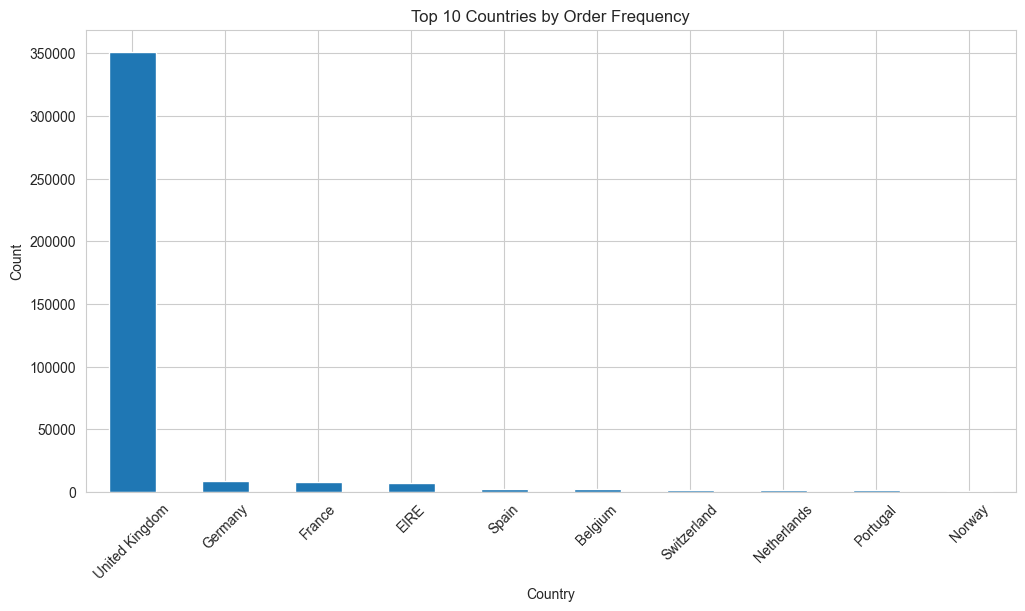

In [26]:
# Explore Order Frequency by Country
country_counts = df_clean['Country'].value_counts()  # Count the number of orders per country

plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar')  # Plot the top 10 countries by order frequency
plt.title('Top 10 Countries by Order Frequency')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Explore Sales Trends Over Time
Visualize daily sales trends over time.

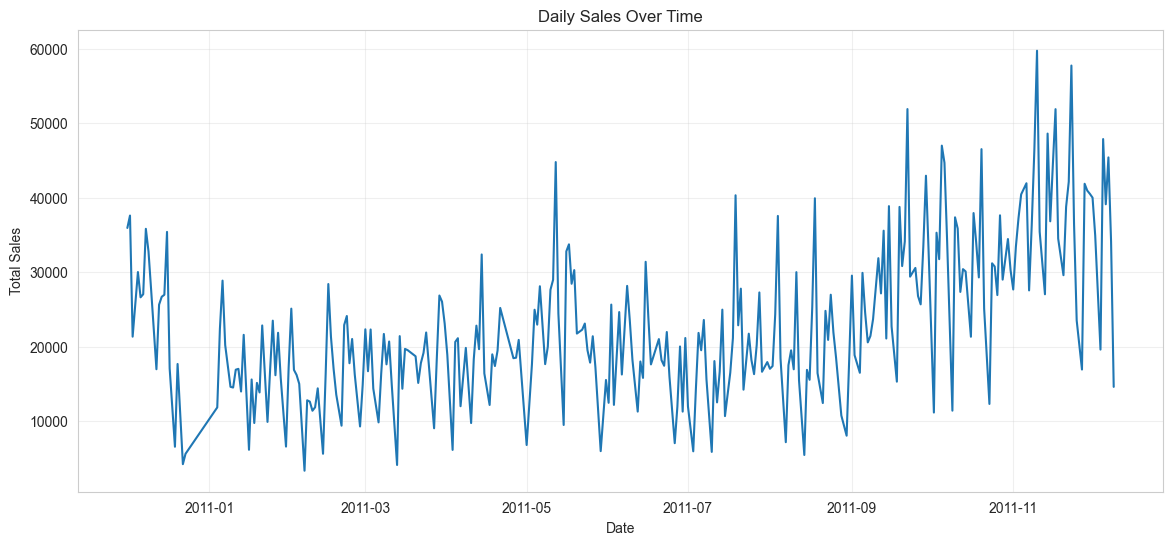

In [27]:
# Explore Sales Trends Over Time

# Group by date and sum the total price for each day
daily_sales = df_clean.groupby(df_clean['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

# Plot daily sales over time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalPrice'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.show()

# Monthly Sales Trend
Visualize monthly sales trends.

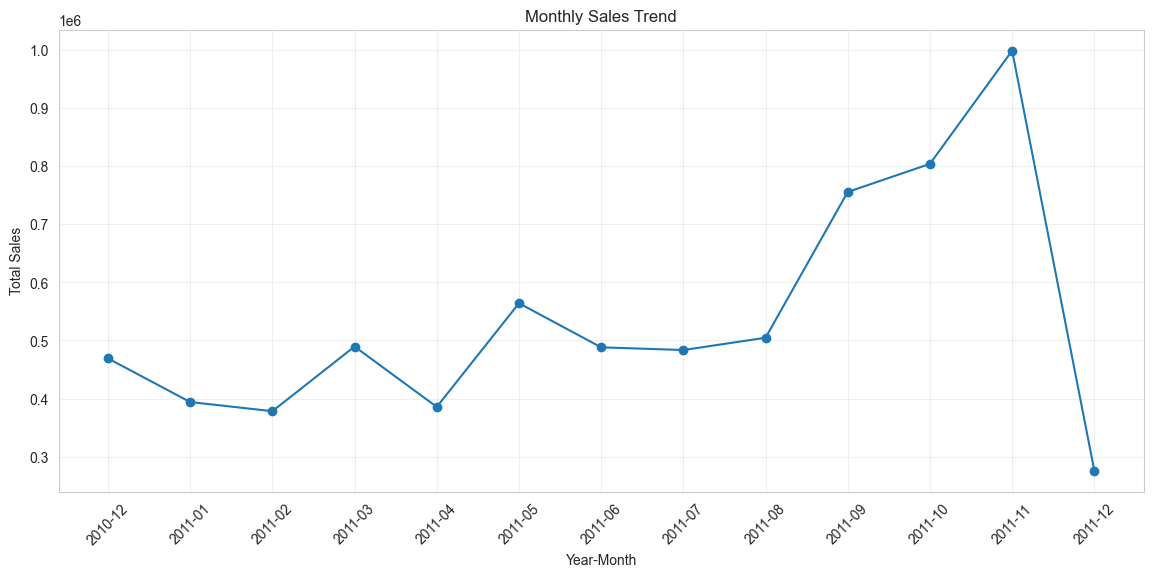

In [28]:
# Monthly Sales Trend

# Group by year and month, then sum the total price for each month
monthly_sales = df_clean.groupby([df_clean['Year'], df_clean['Month']])['TotalPrice'].sum().reset_index()

# Create a new column for Year-Month in the format 'YYYY-MM'
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plot monthly sales trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalPrice'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Popular Products
Visualize the top 10 products by quantity sold.

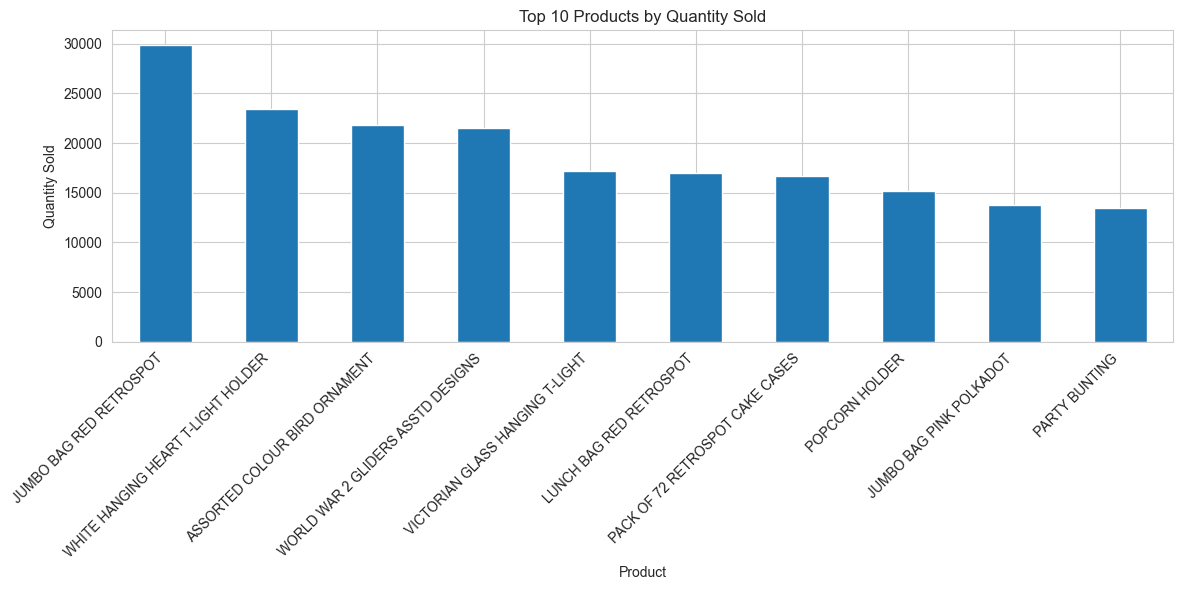

In [29]:
# Popular Products

# Group by product description and sum the quantities sold
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products by quantity sold
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sales by Day of Week
Visualize sales by day of the week.

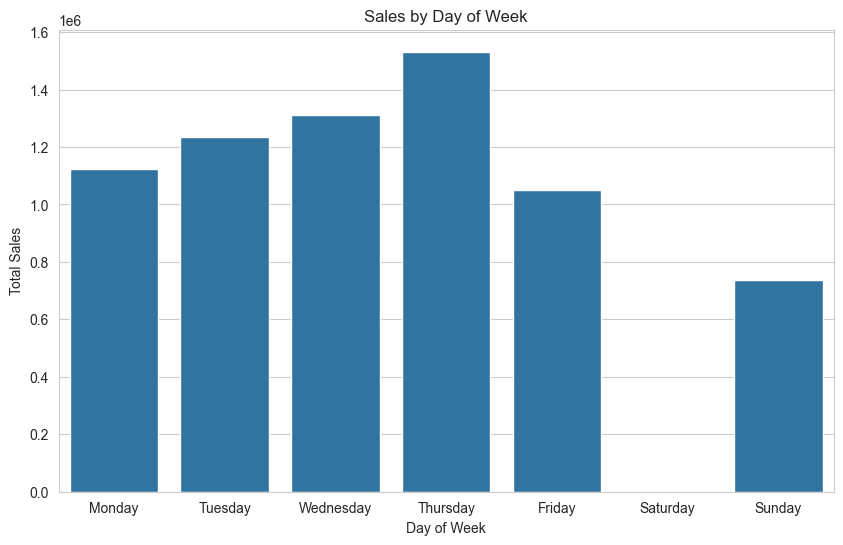

In [30]:
# Sales by Day of Week

# Define weekday names for better readability
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of the week and sum the total price for each day
weekday_sales = df_clean.groupby('DayOfWeek')['TotalPrice'].sum().reindex(range(7))

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=[weekday_names[i] for i in range(7)], y=weekday_sales.values)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

# Hour of Day Sales Distribution
Visualize sales distribution by hour of the day.

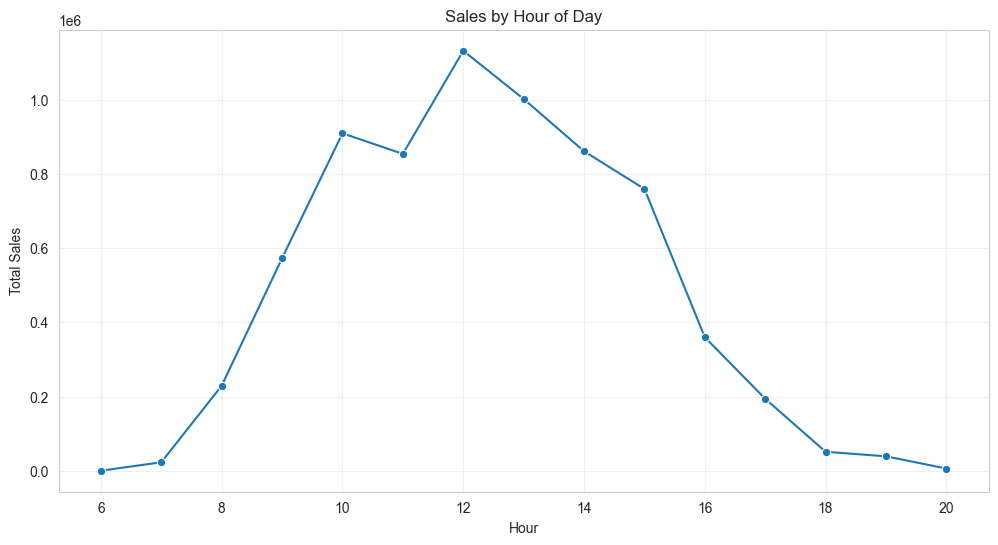

In [31]:
# Hour of Day Sales Distribution

# Group by hour and sum the total price for each hour
hourly_sales = df_clean.groupby('Hour')['TotalPrice'].sum()

# Plot sales by hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.show()

# RFM Analysis (Recency, Frequency, Monetary Value)
Perform RFM analysis to calculate recency, frequency, and monetary value for each customer.

In [ ]:
# RFM Analysis (Recency, Frequency, Monetary Value)

# Get the latest date in the dataset to calculate recency
latest_date = df_clean['InvoiceDate'].max()

# Create RFM aggregations
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (number of orders)
    'TotalPrice': 'sum'  # Monetary Value
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
})

# Display RFM dataframe
print("\nRFM Analysis:")
display(rfm.head())


RFM Analysis:


,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,1,7,4060.40
12348.0,74,4,1195.08
12349.0,18,1,1757.55
12350.0,309,1,334.40
12352.0,35,8,2506.04


Data exploration complete. Cleaned data saved to 'cleaned_retail_data.csv' and 'rfm_data.csv'.


# Plot RFM Distributions
Visualize the distributions of recency, frequency, and monetary value.

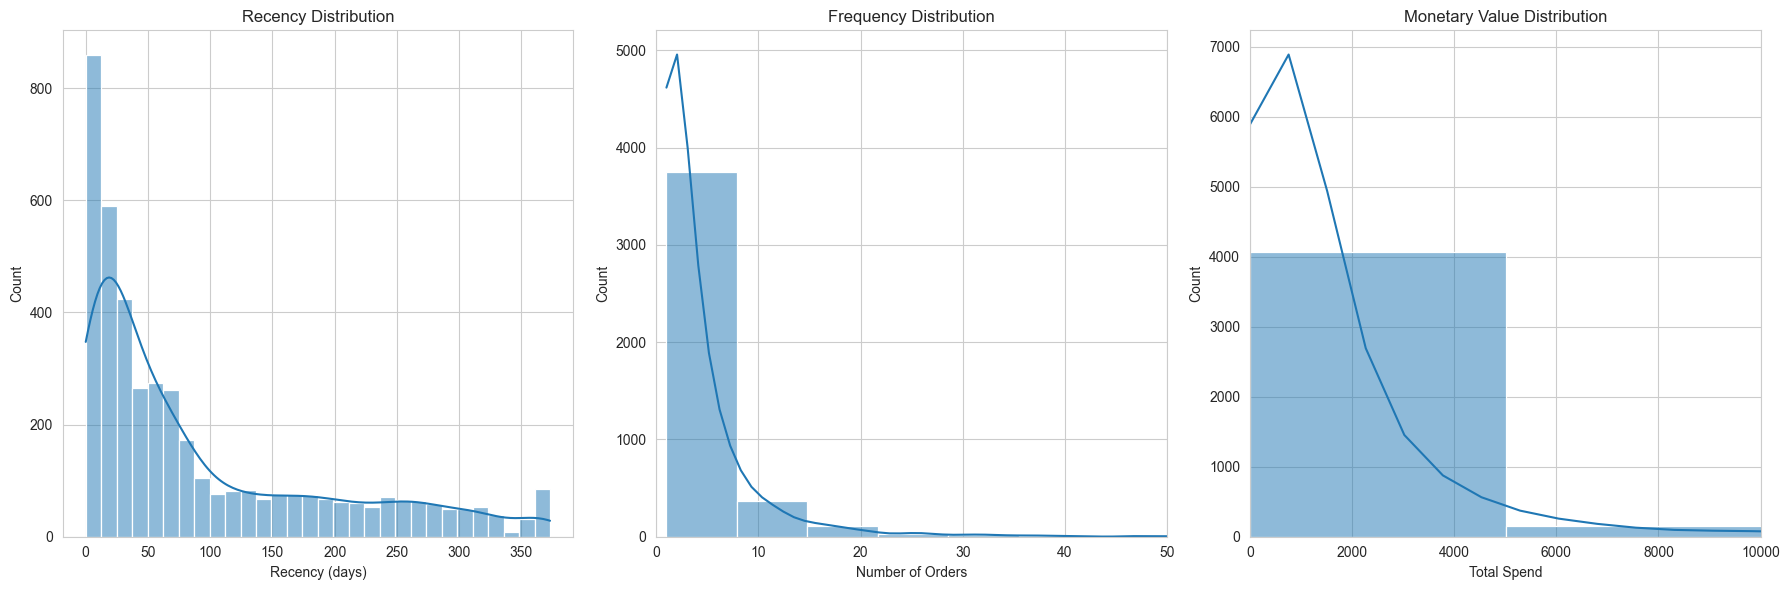

In [36]:
# Plot RFM distributions
plt.figure(figsize=(18, 6))

# Plot Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

# Plot Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Orders')
plt.xlim(0, 50)  # Limiting for better visualization

# Plot Monetary Value distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['MonetaryValue'], bins=30, kde=True)
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spend')
plt.xlim(0, 10000)  # Limiting for better visualization

plt.tight_layout()
plt.show()

# Correlation Between RFM Variables
Visualize the correlation between RFM variables using a heatmap.

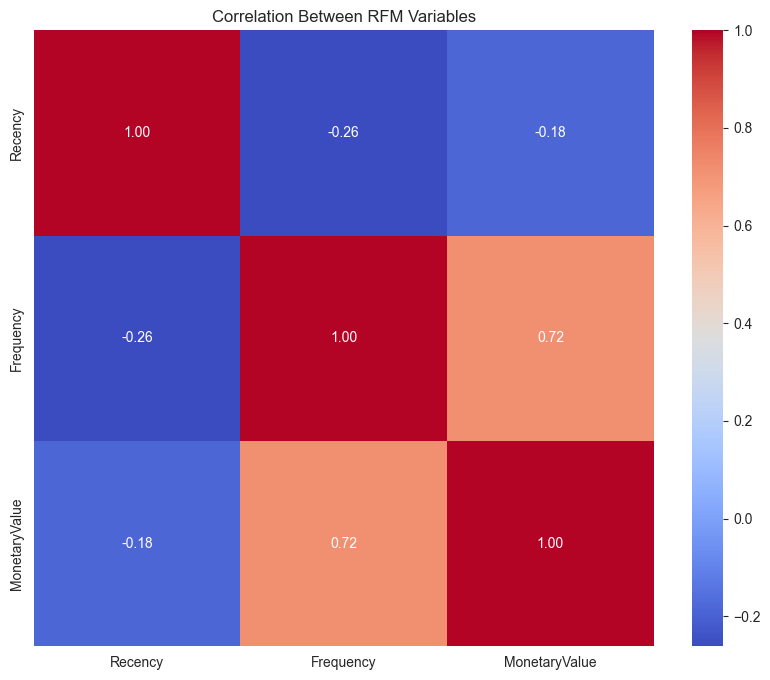

In [37]:
# Correlation between RFM variables
plt.figure(figsize=(10, 8))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between RFM Variables')
plt.show()

# Save Cleaned Data for Modeling
Save the cleaned data and RFM data to CSV files.

In [39]:
# Save Cleaned Data for Modeling

# Save the cleaned data to a CSV file
df_clean.to_csv('cleaned_retail_data.csv', index=False)

# Save the RFM data to a CSV file
rfm.to_csv('rfm_data.csv', index=False)

print("Data exploration complete. Cleaned data saved to 'cleaned_retail_data.csv' and 'rfm_data.csv'.")

Data exploration complete. Cleaned data saved to 'cleaned_retail_data.csv' and 'rfm_data.csv'.
